In [1]:
import numpy as np

In [2]:
predict = np.load('STresnet_prediction.npy')
groundtruth = np.load('STresnet_groundtruth.npy')

In [3]:
predict.max()

0.35384962

In [4]:
groundtruth.shape

(4326, 2, 19, 18)

In [5]:
groundtruth.max()

0.73333335

In [6]:
index = np.random.randint(predict.shape[0])

In [20]:
predict_data=(predict[index]/2+0.5)*45
#groundtruth_data = (groundtruth[index]/2+0.5)*45 

In [21]:
groundtruth_data=(groundtruth[index]/2+0.5)

In [22]:
predict_data.shape

(2, 19, 18)

In [23]:
#for i in range(721):
#    groundtruth_data+=(groundtruth[i]/2+0.5)*45

In [24]:
inflow_predict = predict_data[0]
inflow_groundtruth = groundtruth_data[0]

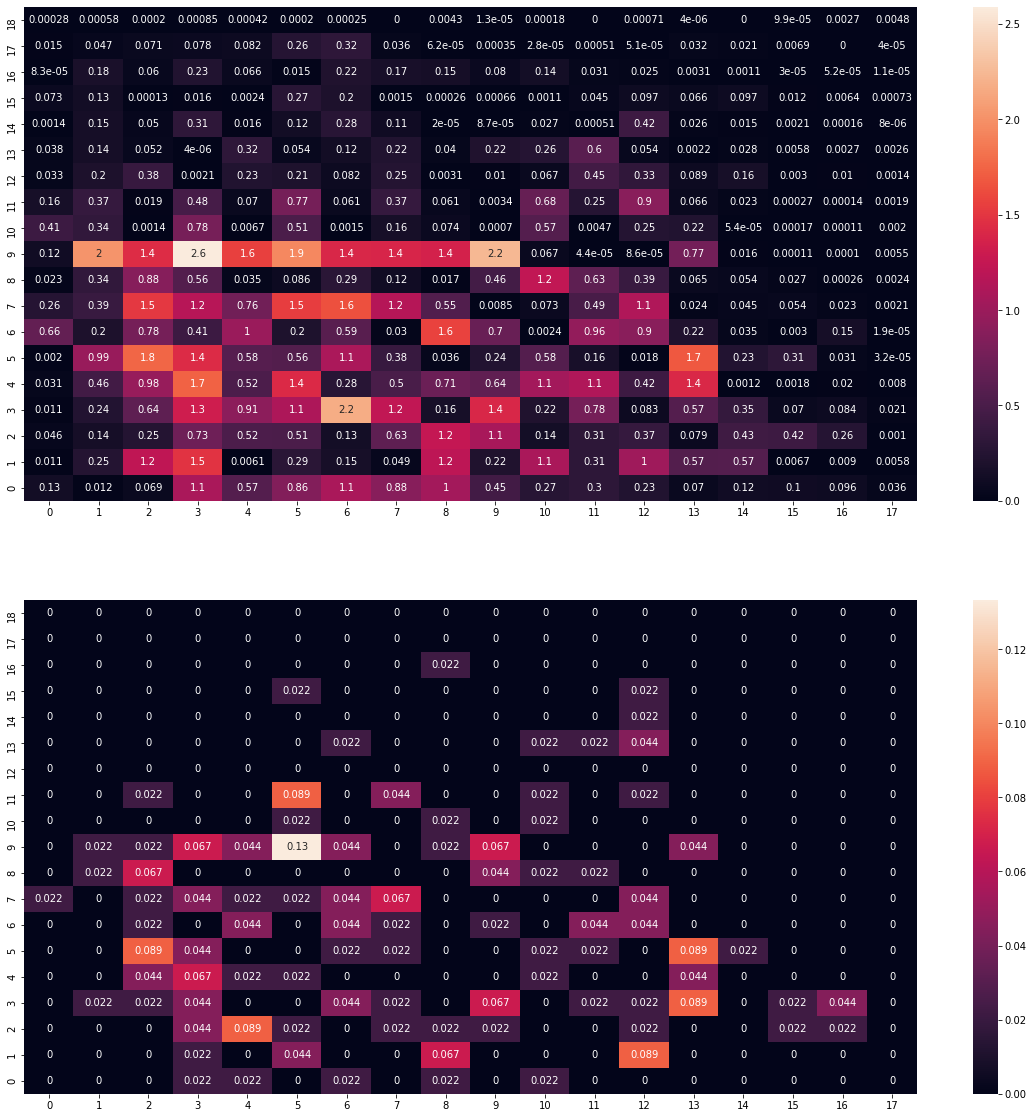

In [25]:
#annot(矩阵上数字),annot_kws(矩阵上数字的大小颜色字体)matplotlib包text类下的字体设置
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
 
f, (ax1, ax2) = plt.subplots(figsize=(20,20),nrows=2)
 
sns.heatmap(inflow_predict, annot=True, ax=ax1).invert_yaxis()
 
sns.heatmap(inflow_groundtruth, annot=True, ax=ax2).invert_yaxis()
# Keyword arguments for ax.text when annot is True.  http://stackoverflow.com/questions/35024475/seaborn-heatmap-key-words

In [26]:
colors=['#9370DB,''#7B68EE,''#6A5ACD,''#483D8B,''#E6E6FA,''#F8F8FF,']

inflow_groundtruth.shape


(19, 18)

In [31]:
import folium
import numpy as np
colors=['#6495ED','#4169E1','#000080','#00008B','#191970','#0000CD','#0000FF']
m = folium.Map(location=[30.726490,104.042102],tiles='Stamen Terrain',zoom_start=12)

lon =104.041
lat =30.655
for i in range(19):
    lon =104.041
    for j in range(18):
        num=int(inflow_groundtruth.max()/7)
        index=int(inflow_groundtruth[i,j]/num)
        if index>5:
            index=5
        folium.vector_layers.Rectangle([[lat,lon],[lat+0.004,lon+0.005]],
        color=colors[index],stroke=False,fill=True,fill_opacity=0.8).add_to(m)
        lon+=0.005
    lat+=0.004 
   
m

ValueError: cannot convert float NaN to integer

In [32]:
# generated data
import numpy as np
lon =104.041
lat =30.655
data=np.zeros([19*18,3])
inflow_groundtruth=inflow_groundtruth/inflow_groundtruth.max()
for i in range(19):
    lon =104.041
    for j in range(18):
        if j%2==0:
            data[i*18+j,:]=[lat,lon,inflow_groundtruth[i,j]]
        lon+=0.005
    lat+=0.004

data=data.tolist()

""" data = (
    np.random.normal(size=(100, 3)) *
    np.array([[0.1, 0.1, 0.1]]) +
    np.array([[40, 116.5, 1]])
).tolist()
data[:3] """


' data = (\n    np.random.normal(size=(100, 3)) *\n    np.array([[0.1, 0.1, 0.1]]) +\n    np.array([[40, 116.5, 1]])\n).tolist()\ndata[:3] '

In [33]:
""" data = (
    np.random.normal(size=(100, 3)) *
    np.array([[0.1, 0.1, 0.1]]) +
    np.array([[40, 116.5, 1]])
) """
data[:1]

[[30.655, 104.041, 0.0]]

In [34]:
# HeatMap
from folium.plugins import HeatMap
m = folium.Map([30.726490,104.042102], tiles='stamentoner', zoom_start=12)
HeatMap(data).add_to(m)
# m.save(os.path.join('results', 'Heatmap.html'))
m


In [35]:
inflow_groundtruth.max()

1.0